# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [2]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [3]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

In [4]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

In [5]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [6]:
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [7]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [8]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [9]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

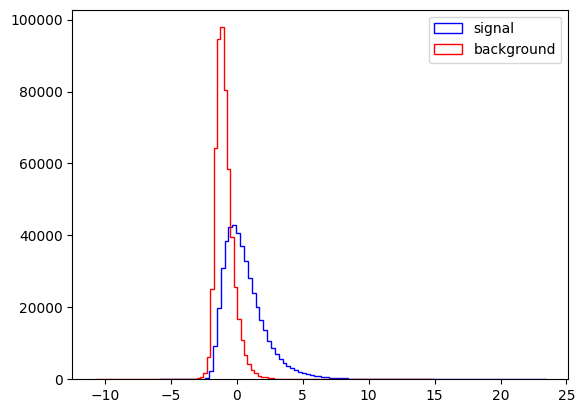

In [10]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

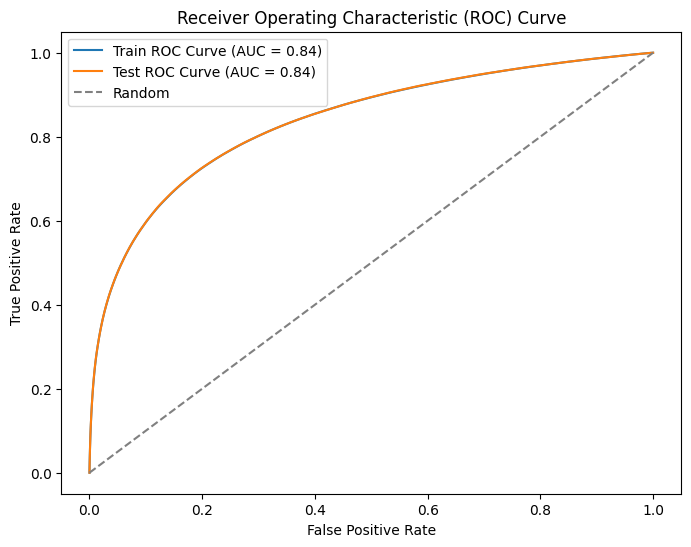

In [33]:
import sklearn.discriminant_analysis as DA
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# will generate predictions for training and testing sets
y_train_pred = Fisher.predict_proba(X_Train)[:, 1]
y_test_pred = Fisher.predict_proba(X_Test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_Train, y_train_pred) # calculate ROC curve for train set
fpr_test, tpr_test, _ = roc_curve(y_Test, y_test_pred) # calculate ROC curve for test set
auc_train = roc_auc_score(y_Train, y_train_pred) # calculate AUC score for train set
auc_test = roc_auc_score(y_Test, y_test_pred) # calculate AUC score for test set

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

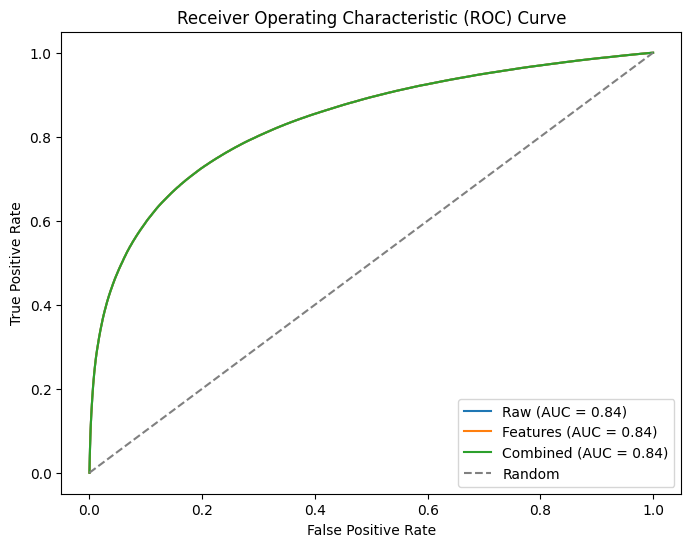

In [14]:
Fisher_raw = DA.LinearDiscriminantAnalysis()
Fisher_raw.fit(X_Train, y_Train)

Fisher_features = DA.LinearDiscriminantAnalysis()
Fisher_features.fit(X_Train[VarNames[1:]], y_Train)
# using both raw and features
Fisher_combined = DA.LinearDiscriminantAnalysis()
Fisher_combined.fit(X_Train, y_Train)

# generating predictions for the test set
y_test_pred_raw = Fisher_raw.predict_proba(X_Test)[:, 1]
y_test_pred_features = Fisher_features.predict_proba(X_Test[VarNames[1:]])[:, 1]
y_test_pred_combined = Fisher_combined.predict_proba(X_Test)[:, 1]

# calculating ROC curves and AUC scores for each 
fpr_raw, tpr_raw, _ = roc_curve(y_Test, y_test_pred_raw)
auc_raw = roc_auc_score(y_Test, y_test_pred_raw)
fpr_features, tpr_features, _ = roc_curve(y_Test, y_test_pred_features)
auc_features = roc_auc_score(y_Test, y_test_pred_features)
fpr_combined, tpr_combined, _ = roc_curve(y_Test, y_test_pred_combined)
auc_combined = roc_auc_score(y_Test, y_test_pred_combined)

# plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_raw, tpr_raw, label=f'Raw (AUC = {auc_raw:.2f})')
plt.plot(fpr_features, tpr_features, label=f'Features (AUC = {auc_features:.2f})')
plt.plot(fpr_combined, tpr_combined, label=f'Combined (AUC = {auc_combined:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

I am doing support vector machines classifier, stochastic gradient classifier, and decision tree classifier

In [25]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

def compare_class(classifiers, x_train, y_train, x_test, y_test):
    plt.figure(figsize=(8,6))
    for clf_name, clf in classifiers.items():
        if hasattr(clf, "decision_function"):
            y_test_scores = clf.decision_function(x_test)
        else:
            y_test_scores = clf.predict(x_test)
        fpr, tpr, _ = roc_curve(y_test, y_test_scores)
        auc_score = roc_auc_score(y_test, y_test_scores)
        plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [26]:
classifiers = {
    'SVM': SVC(),
    'SGD': SGDClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
}

# Perform comparison
compare_class(classifiers, x_train, y_train, x_test, y_test)

NameError: name 'x_train' is not defined

### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

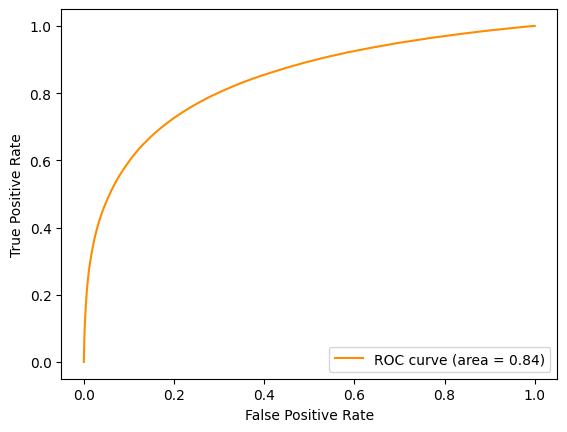

In [12]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 
